In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/codes/assets/dasma_brgy.xlsx'
df = pd.read_excel(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
population_column = df.columns[5]
barangay_column = df.columns[0]

df_filtered = df[df[barangay_column] != 'Dasmariñas']
df_filtered = df_filtered[[barangay_column, population_column]]
df_large_population = df_filtered[df_filtered[population_column] > 10000]
df_small_population = df_filtered[df_filtered[population_column] < 10000]


Barangays with more than 10,000 people

In [5]:
# BARANGAYS W/ 10,000+
print(df_large_population)

               Name  PopulationCensus2020-05-01
0             Burol                       11902
1           Burol I                       17287
3         Burol III                       10921
11       Langkaan I                       26939
12      Langkaan II                       33651
15      Paliparan I                       10125
16     Paliparan II                       20804
17    Paliparan III                       72945
18           Sabang                       17329
21          Salawag                       78778
23      Salitran II                       12337
24     Salitran III                       15396
25      Salitran IV                       11819
27      Sampaloc II                       18225
28     Sampaloc III                       13807
29      Sampaloc IV                       41678
31    San Agustin I                       11971
32   San Agustin II                       11692
33  San Agustin III                       10178
44         San Jose                     

In [51]:
# FILTER
df_large_population = df_filtered[df_filtered[population_column] > 10000].copy()


In [52]:
df_large_population.loc[:, 'Confirmed Cases'] = np.random.randint(0, 15000, size=len(df_large_population))
df_large_population.loc[:, 'Recoveries'] = np.random.randint(0, 15000, size=len(df_large_population))

In [53]:
df_large_population.loc[:, 'Deaths'] = df_large_population['Confirmed Cases'] - df_large_population['Recoveries']


In [54]:
df_large_population.loc[:, 'Deaths'] = df_large_population['Deaths'].apply(lambda x: max(0, x))


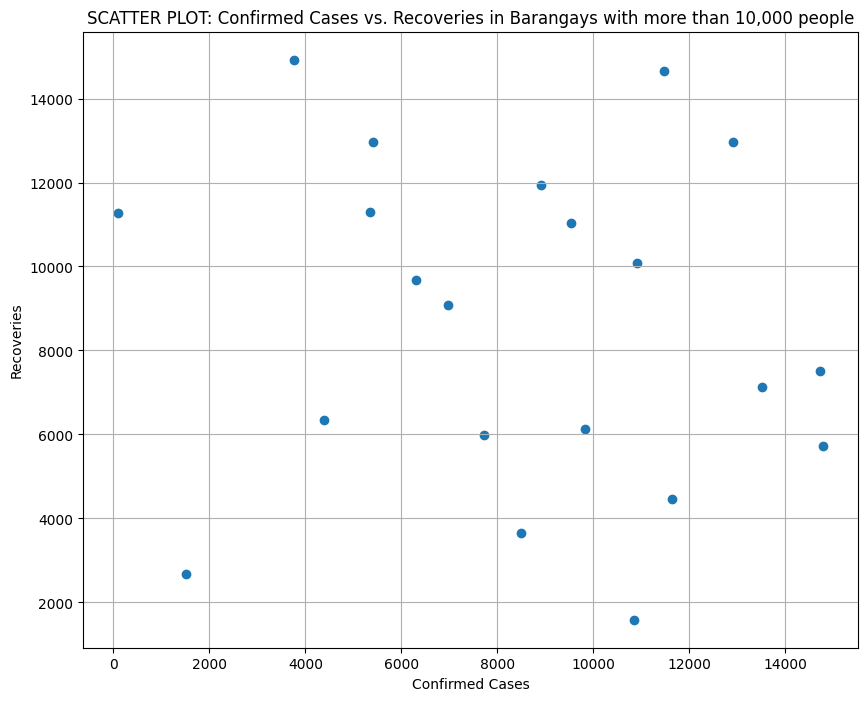

In [73]:
#SCATTER PLOT
plt.figure(figsize=(10, 8))
plt.scatter(df_large_population['Confirmed Cases'], df_large_population['Recoveries'])
plt.title('SCATTER PLOT: Confirmed Cases vs. Recoveries in Barangays with more than 10,000 people')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recoveries')
plt.grid(True)
plt.show()

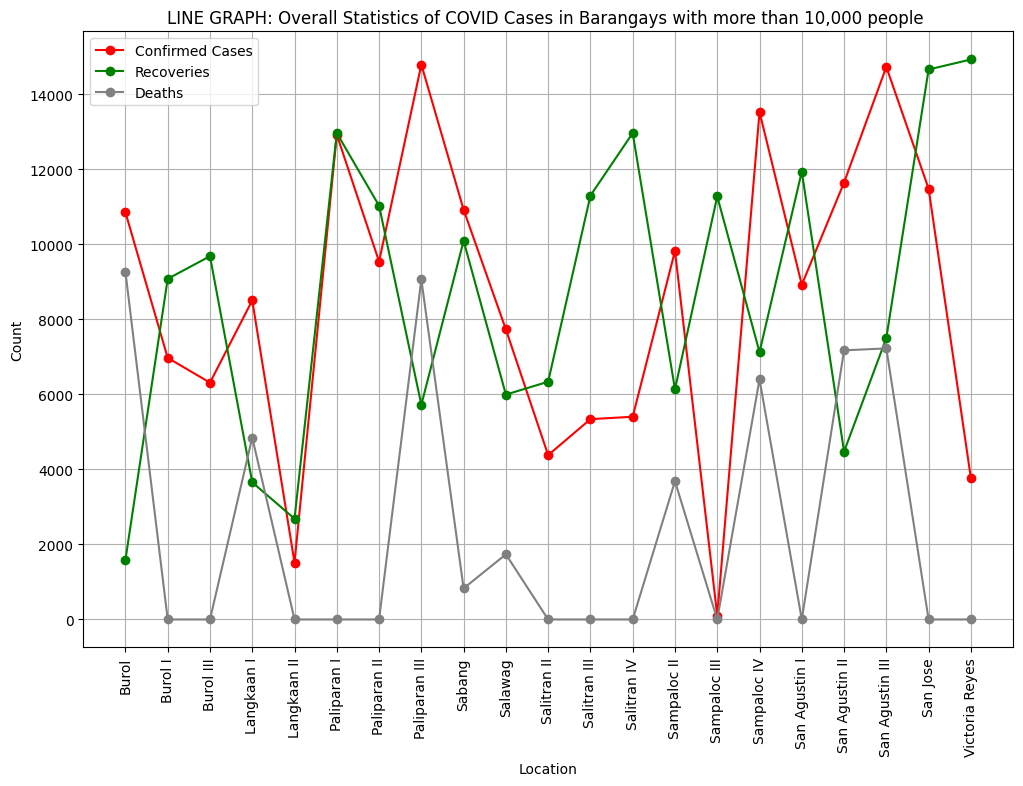

In [87]:
#LINE GRAPH
plt.figure(figsize=(12, 8))
plt.plot(df_large_population[df_large_population.columns[0]], df_large_population['Confirmed Cases'], label='Confirmed Cases', marker='o', color='red')
plt.plot(df_large_population[df_large_population.columns[0]], df_large_population['Recoveries'], label='Recoveries', marker='o', color='green')
plt.plot(df_large_population[df_large_population.columns[0]], df_large_population['Deaths'], label='Deaths', marker='o', color='gray')
plt.title('LINE GRAPH: Overall Statistics of COVID Cases in Barangays with more than 10,000 people ')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


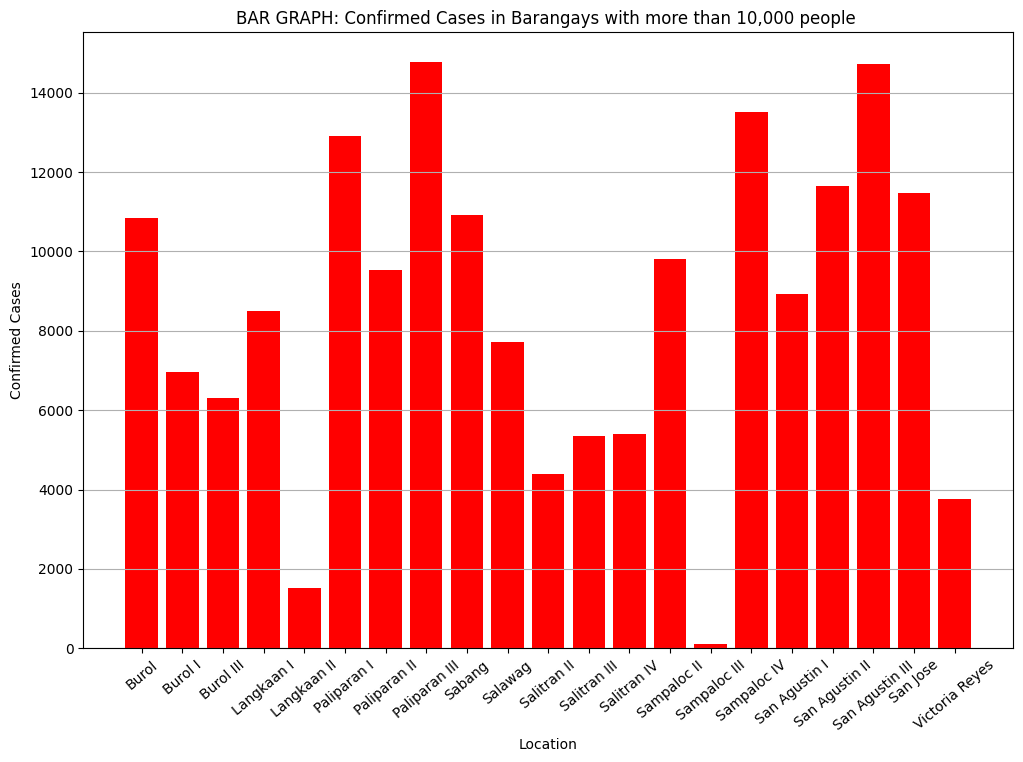

In [108]:
#BAR GRAPH
plt.figure(figsize=(12, 8))
plt.bar(df_large_population[df_large_population.columns[0]], df_large_population['Confirmed Cases'], color='red')
plt.title('BAR GRAPH: Confirmed Cases in Barangays with more than 10,000 people ')
plt.xlabel('Location')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=40)
plt.grid(axis='y')
plt.show()


In [78]:
# SUM OF TOTAL CASES

total_confirmed_cases = df_large_population['Confirmed Cases'].sum()
total_recoveries = df_large_population['Recoveries'].sum()
total_deaths = df_large_population['Deaths'].sum()


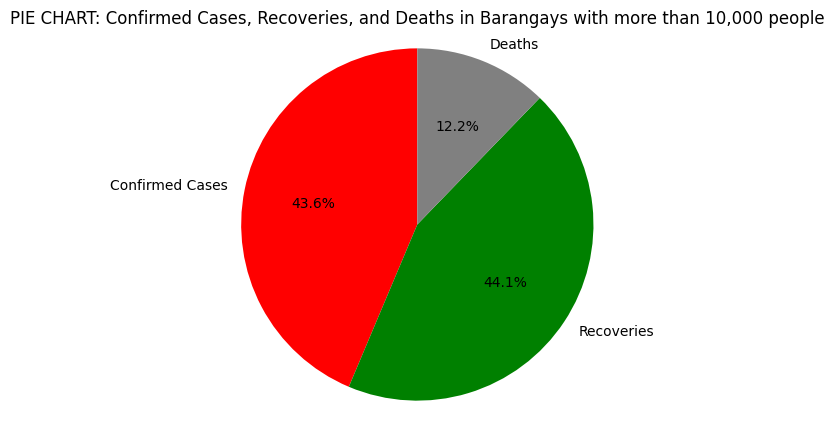

In [91]:
#PIE CHART
labels = ['Confirmed Cases', 'Recoveries', 'Deaths']
sizes = [total_confirmed_cases, total_recoveries, total_deaths]
colors = ['red','green','gray']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('PIE CHART: Confirmed Cases, Recoveries, and Deaths in Barangays with more than 10,000 people')
plt.show()



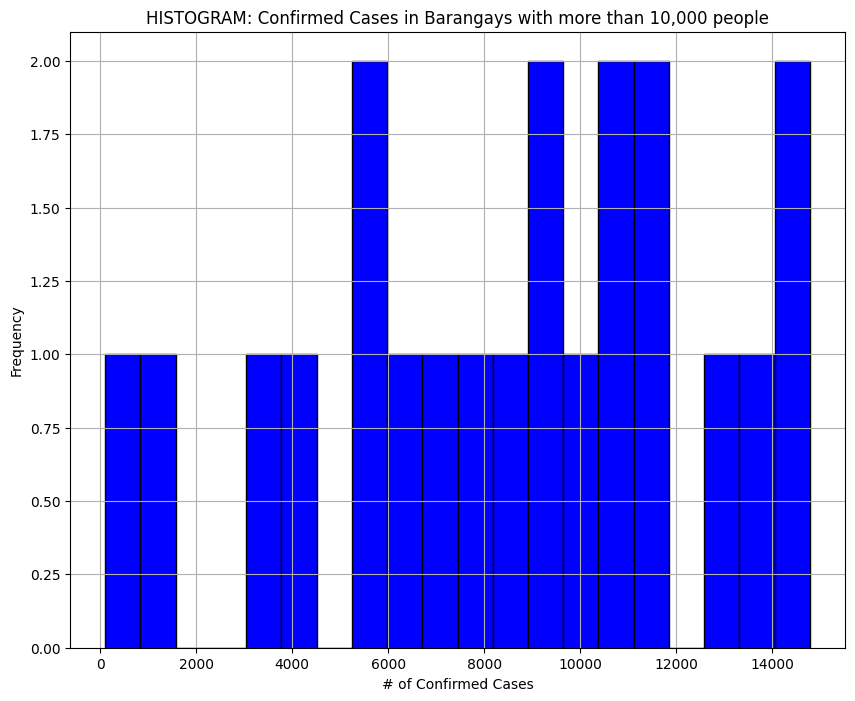

In [90]:
#HISTOGRAM
plt.figure(figsize=(10, 8))
plt.hist(df_large_population['Confirmed Cases'], bins=20, color='blue', edgecolor='black')
plt.title('HISTOGRAM: Confirmed Cases in Barangays with more than 10,000 people')
plt.xlabel('# of Confirmed Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Barangays with less than 10,000 people

In [92]:
# BARANGAYS W/ 10,000-

print(df_small_population)


               Name  PopulationCensus2020-05-01  Confirmed Cases  Recoveries  \
0             Burol                       11902              425         751   
1           Burol I                       17287              979          16   
3         Burol III                       10921              515         355   
11       Langkaan I                       26939              400         508   
12      Langkaan II                       33651              458         995   
15      Paliparan I                       10125              878          92   
16     Paliparan II                       20804              214         456   
17    Paliparan III                       72945              431         503   
18           Sabang                       17329              384          91   
21          Salawag                       78778              587         424   
23      Salitran II                       12337              227         355   
24     Salitran III                     

In [93]:
df_small_population = df_filtered[df_filtered[population_column] > 10000].copy()

In [97]:
df_small_population.loc[:, 'Confirmed Cases'] = np.random.randint(0, 9999, size=len(df_small_population))
df_small_population.loc[:, 'Recoveries'] = np.random.randint(0, 9999, size=len(df_small_population))

In [98]:
df_small_population.loc[:, 'Deaths'] = df_small_population['Confirmed Cases'] - df_small_population['Recoveries']
df_small_population.loc[:, 'Deaths'] = df_small_population['Deaths'].apply(lambda x: max(0, x))

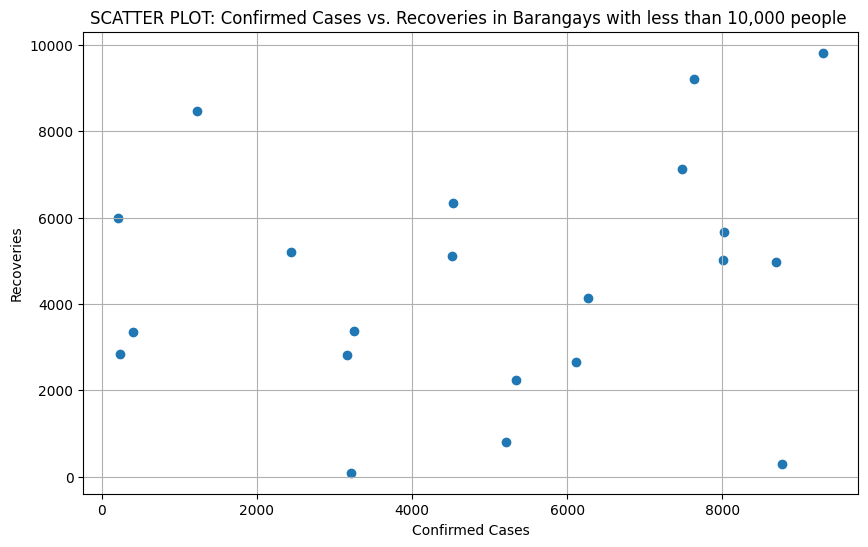

In [102]:
#SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(df_small_population['Confirmed Cases'], df_small_population['Recoveries'])
plt.title('SCATTER PLOT: Confirmed Cases vs. Recoveries in Barangays with less than 10,000 people ')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recoveries')
plt.grid(True)
plt.show()


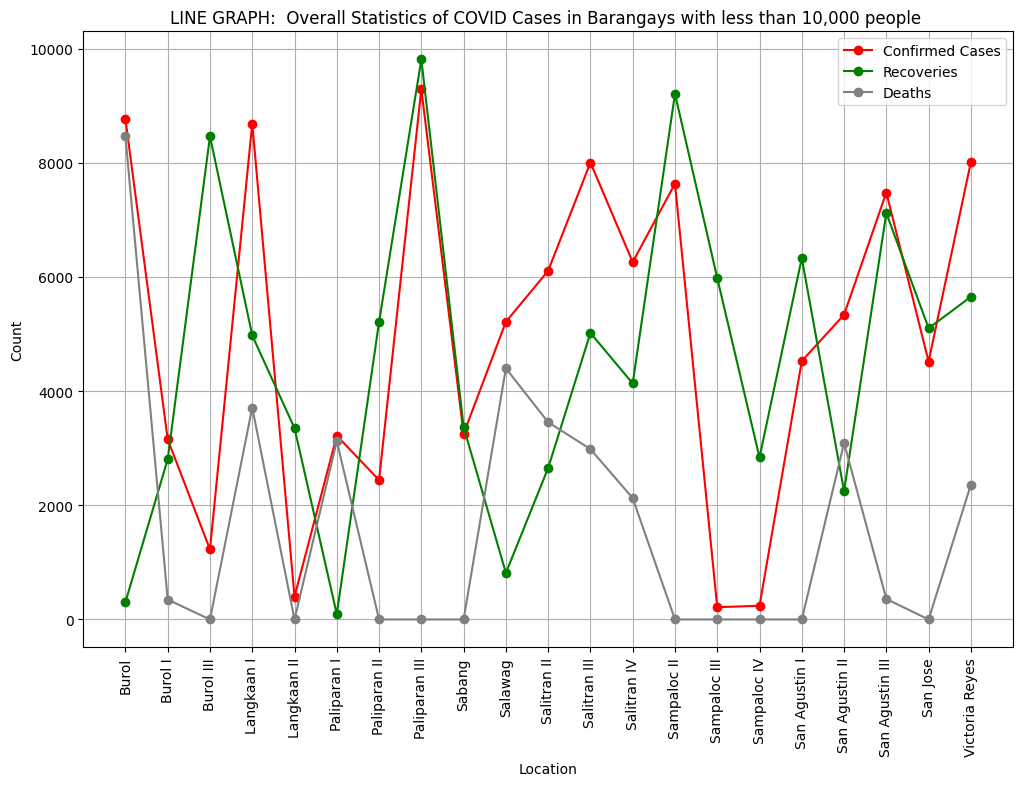

In [106]:
#LINE GRAPH
plt.figure(figsize=(12, 8))
plt.plot(df_small_population[df_small_population.columns[0]], df_small_population['Confirmed Cases'], label='Confirmed Cases', marker='o', color='red')
plt.plot(df_small_population[df_small_population.columns[0]], df_small_population['Recoveries'], label='Recoveries', marker='o', color='green')
plt.plot(df_small_population[df_small_population.columns[0]], df_small_population['Deaths'], label='Deaths', marker='o', color='gray')
plt.title('LINE GRAPH:  Overall Statistics of COVID Cases in Barangays with less than 10,000 people ')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


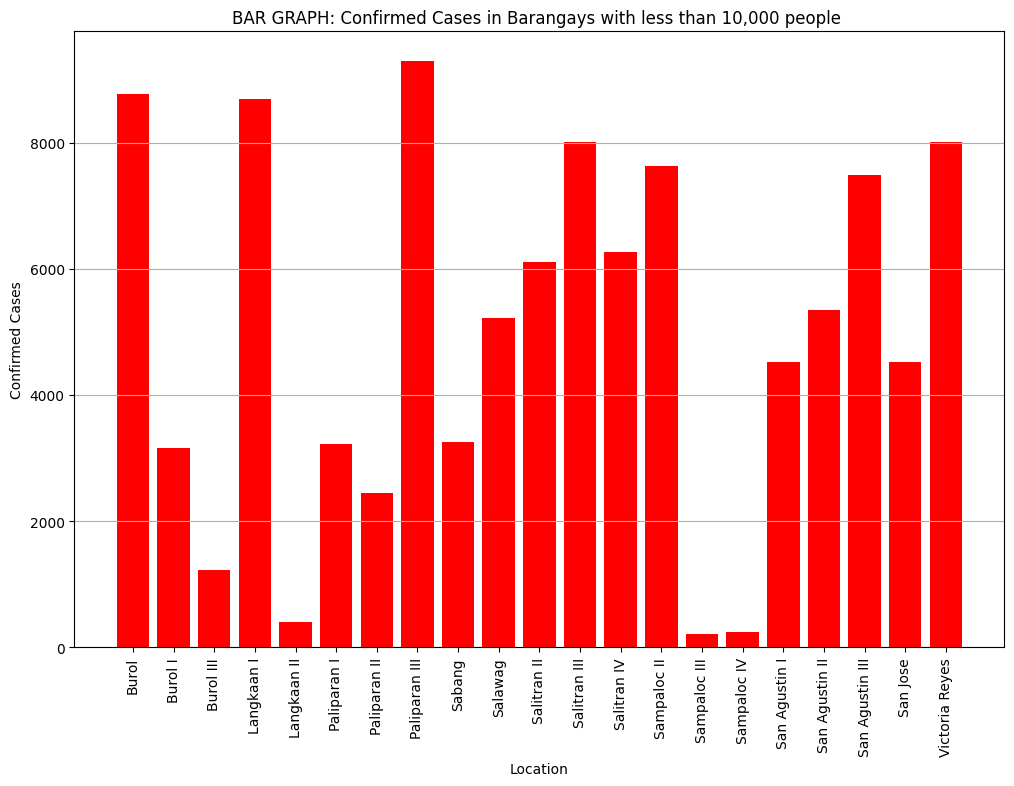

In [107]:
#BAR GRAPH
plt.figure(figsize=(12, 8))
plt.bar(df_small_population[df_small_population.columns[0]], df_small_population['Confirmed Cases'], color='red')
plt.title('BAR GRAPH: Confirmed Cases in Barangays with less than 10,000 people ')
plt.xlabel('Location')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [114]:
# SUM OF TOTAL CASES

total_confirmed_cases = df_small_population['Confirmed Cases'].sum()
total_recoveries = df_small_population['Recoveries'].sum()
total_deaths = df_small_population['Deaths'].sum()


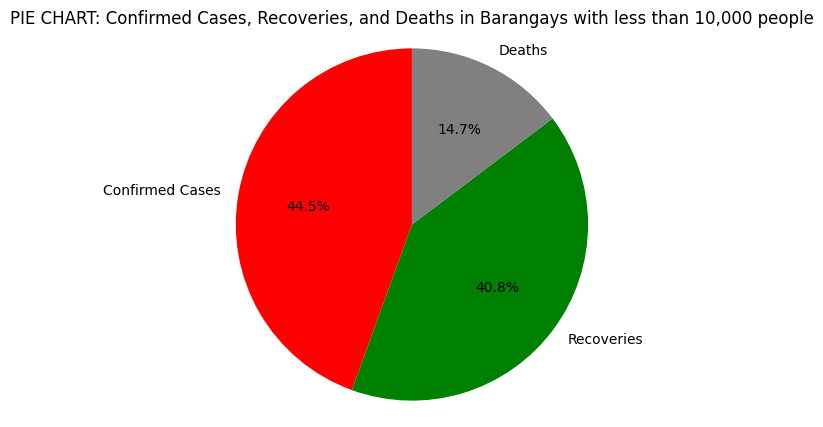

In [119]:
# PIE CHART
labels = ['Confirmed Cases', 'Recoveries', 'Deaths']
sizes = [total_confirmed_cases, total_recoveries, total_deaths]
colors = ['red','green','gray']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('PIE CHART: Confirmed Cases, Recoveries, and Deaths in Barangays with less than 10,000 people')
plt.show()


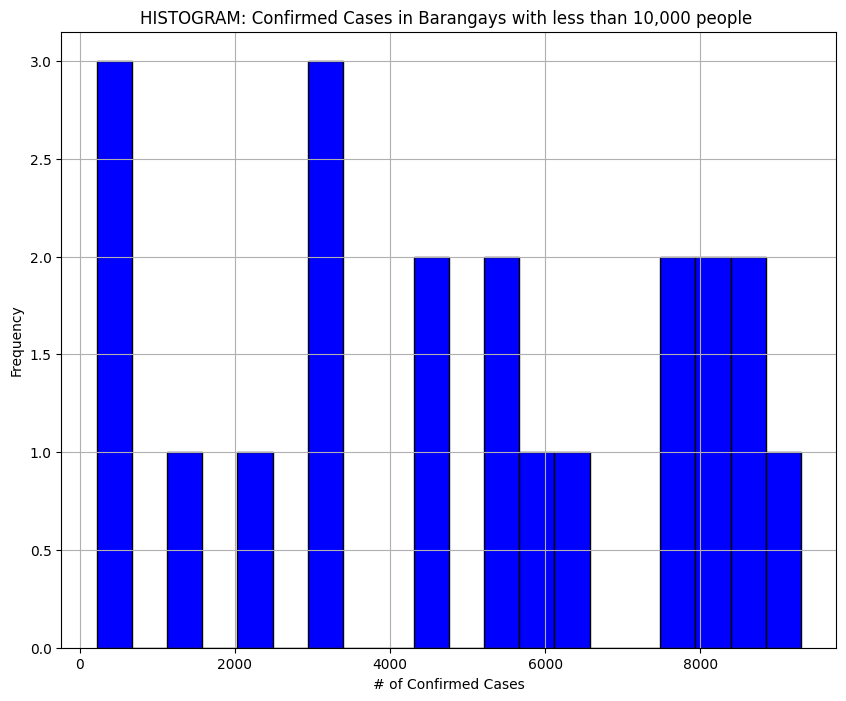

In [117]:
#HISTOGRAM
plt.figure(figsize=(10, 8))
plt.hist(df_small_population['Confirmed Cases'], bins=20, color='blue', edgecolor='black')
plt.title('HISTOGRAM: Confirmed Cases in Barangays with less than 10,000 people ')
plt.xlabel('# of Confirmed Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
